# Finite Difference Method (FDM)
Diskretized derivatives are to be derived by a Taylor expansion. Suppose we are given a regular grid $x\in\{x_0,x_1,x_2.\dots,x_n\}$, with $h=x_i-x_{i-1}\forall 
\;i\in\mathbb{N}$. We introduce the nomenclature $f(x_i)=f_i$. Thus the Taylor expansion of the function $f(x')$ around $f(x)$ reads:

\begin{align}
f(x_i-2h) &= f_i-2h\cdot f_i'+2h^2\cdot f_i''-\frac{4h^3}{3}\cdot f_i'''+ \mathcal{O}(h^4) \\
f(x_i-h) &= f_i-h\cdot f_i'+\frac{h^2}{2}\cdot f_i''-\frac{h^3}{6}\cdot f_i'''+ \mathcal{O}(h^4) \\
f(x_i) &= f_i\\
f(x_i+h) &= f_i+h\cdot f_i'+\frac{h^2}{2}\cdot f_i''+\frac{h^3}{6}\cdot f_i'''+ \mathcal{O}(h^4) \\
f(x_i+2h) &= f_i+2h\cdot f_i'+2h^2\cdot f_i''+\frac{4h^3}{3}\cdot f_i'''+ \mathcal{O}(h^4)
\end{align}
**Note:** ${\mathcal O}(h^n)$ means that we truncate the Taylor series neglecting
all the following terms that are of oder $m\ge n$ in $h$. If, e.g., we are given
a derivative with accuracy to ${\mathcal O}(h^2)$ it means that halfening $h$ the 
error goes by $1/4$.

Then the first derivative at $x_i$ to ${\mathcal O}(h^2)$ reads
\begin{align}
f'_{i} &= \frac{f_{i+1}-f_{i-1}}{2h} + \mathcal{O}(h^2)
\end{align}
While the second derivative at $x_i$ to ${\mathcal O}(h^2)$ reads
\begin{align}
f''_{i} &= \frac{f_{i+1}-2f_i+f_{i-1}}{h^2} + \mathcal{O}(h^2)
\end{align}

**Now you:**
* Calculate the first derivative at $x_0$ to ${\mathcal O}(h^2)$
  where there are no more grid pointsto its left
* Calculate the first derivative at $x_n$ to ${\mathcal O}(h^2)$
  where there are no more grid points to its right
* Do the same for the 2nd deravtive

## Numerical solution of the diffusion equation

$$\frac{\partial u(x,t)}{\partial t}=D\frac{\partial^2 u(x,t)}{\partial x^2}$$

given the initial condiditions 
$$
u(x,0)=f(x)\left\{
\begin{matrix}
1&\text{ for }1\le x\le 2\\
0&\text{ else}
\end{matrix}
\right.
$$
as well as three different kinds of boundary conditions

1. None
2. $u(0,t)=0.5$
3. $u'(0,t)=1.0$

We give the directized verion of the diffusion equation to read
$$
\frac{u^{k+1}_{i}-u^{k}_{i}}{\Delta t} = D\frac{u^k_{i+1}-2u^k_i+u^k_{i-1}}{h^2} + \mathcal{O}(h^2)
$$
**Note:** The subscript $i$ describes the discrete spatial points $x_i$
and the superscript $k$ accounts for the specific moment $t_k$ in time.
We assume $\Delta t=t_k-t_{k-1}$.

In [9]:
import matplotlib.pyplot as plt  #import the libraries it needs
import numpy as np

In [10]:
n = 1000         # number of grid points
u = np.zeros(n)  # setup of the discrete variable u
u[400:600] = 1.  # initial condition
u0 = u.copy()    # save initial contidion to extra array in order not to overwrite

### Explicit integration scheme
This means to take the spatial derivatives at the old timestep $t_k$: 
The algorithm reads

$$
u^{k+1}_{i} = u^{k}_{i} + \frac{D\Delta t}{h^2}
\left(u^k_{i+1}-2u^k_i+u^k_{i-1}\right) + \mathcal{O}(h^2)
$$

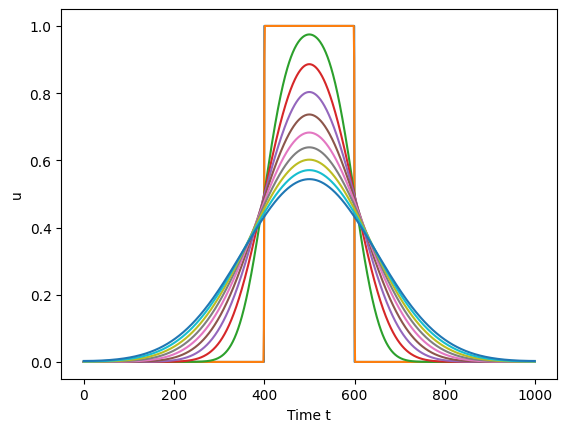

In [23]:
fig, ax = plt.subplots()  # setup graphics
#
ax.plot(u0)               # plot the initial condition
ax.set_xlabel('Time t')   # axis labels
ax.set_ylabel('u')
#
m = 100000                # number of iteration steps
inter = m//10             # plot every
dt = 0.10                 # choose the timestep
h  = 1.00                 # choose the pitch h
D  = 1.
a  = D*dt/h**2
#
for i in np.arange(m):    # The iteration loop
   # und hier kommt Ihr code
    if i%inter == 0:      # Plot u
        ax.plot(u)

### Implicit scheme
This means to take the spatial derivatives at the old timestep $t_k$ and thus the 
algorithm reads
$$
u^{k+1}_{i}  + \frac{D\Delta t}{h^2}
\left(u^{k+1}_{i+1}-2u^{k+1}_i+u^{k+1}_{i-1}\right)
= u^{k}_{i}
$$
This leads to a system of linear equations to be solved at any timestep
$$\mathbf{A}\,\vec{u}^{\,k+1}=\vec{u}^{\,k}$$
Therefore we need ```scipy.linalg.solve```

In [13]:
from scipy.linalg import solve

In [12]:
# Just repeat the intial conditions
n = 1000         # number of grid points
u = np.zeros(n)  # setup of the discrete variable u
u[400:600] = 1.  # initial condition
u0 = u.copy()    # save initial contidion to extra array in order not to overwrite

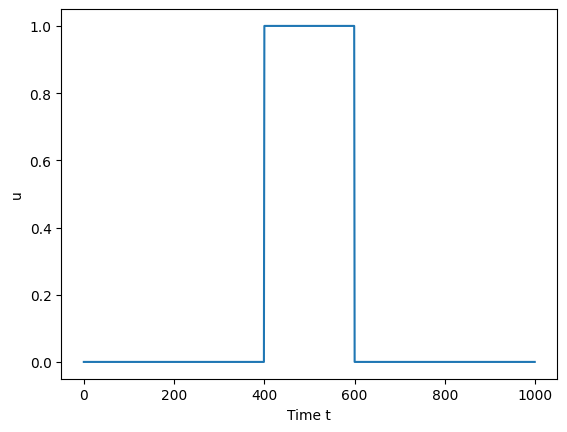

In [25]:
fig, ax = plt.subplots()
#
ax.plot(u0)
ax.set_xlabel('Time t')
ax.set_ylabel('u')
#
#
m = 100000                # number of iteration steps
inter = m//10             # plot every
dt = 0.10                 # choose the timestep
h  = 1.00                 # choose the pitch h
D  = 1.0                  # Diffusion constant
a  = D*dt/h**2
# The matrix A is constant and includes all the coefficients
# of the linear system and a 1 one the diagonal to account for
# u at the new timestep
# Create A
A = np.zeros((n,n))
A[np.arange(n),np.arange(n)] = 1. + 2.*a
A[np.arange(n-1),np.arange(1,n)] = -a
A[np.arange(1,n),np.arange(n-1)] = -a
#
for i in np.arange(m):

In [ ]:
for i in np.arange(m):    # The iteration loop
    uleft = np.roll(u,1)  # u shifted to the left
    uright = np.roll(u,-1)# u shifted to the right
    u = u + dt/h**2*(uright-2.*u+uleft)
    if i%inter == 0:      # Plot u
        ax.plot(u)

In [ ]:
a = 3.
1//a

## Wellengleichung

\begin{align}
\frac{\partial^2 u(x,t)}{\partial x^2}&=\frac{1}{c^2}\frac{\partial^2 u(x,t)}{\partial t^2}\\
\text{oder diskretisiert }&\text{(mit c=1)}\\
\frac{u_{i+1,k}-2u_{i,k}+u_{i-1,k}}{\Delta x^2} &= \frac{u_{i,k+1}-2u_{i,k}+u_{i,k-1}}{\Delta t^2}
\end{align}

... und jetzt Sie!

In [7]:
inter

10

In [20]:
# Create A with the list comprehension trick
A = np.zeros((n,n))
A[np.arange(n),np.arange(n)]=1

#

In [29]:
# Create A
A = np.zeros((n,n))
A[np.arange(n),np.arange(n)] = 1. + 2.*a
A[np.arange(n-1),np.arange(1,n)] = -a
A[np.arange(1,n),np.arange(n-1)] = -a
#
print(A)

[[ 1.2 -0.1  0.  ...  0.   0.   0. ]
 [-0.1  1.2 -0.1 ...  0.   0.   0. ]
 [ 0.  -0.1  1.2 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.2 -0.1  0. ]
 [ 0.   0.   0.  ... -0.1  1.2 -0.1]
 [ 0.   0.   0.  ...  0.  -0.1  1.2]]
